In [1]:
from glob import glob
import pylab as plt
import xuleta as xu
import numpy as np

In [4]:
f = '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/clipped_RN_raw/'
fout = '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/medianas_seasons/'

In [5]:
l = sorted(glob(f+"*.tif"))

In [6]:
#l = [x for x in l if x[-9:-7] in ['02','03','04','09','10','11'] and x[-12:-10] in ['14','15','16']]
l2 = [x for x in l if x[-12:-10] in ['14','15','16']]

In [7]:
for i in ['2014','2015','2016']:
    
    l2 = [x for x in l if x[-12:-10] in i[2:]]
    l2
    arrays = []
    for j in l2:
        imagem, meta = xu.TifToArray(j)
        imagem = np.where(imagem==32767,np.nan,imagem)
        arrays.append(imagem)
        arrays2 = np.dstack(arrays)    
    soma = np.nansum(arrays2,axis=2)
    xu.ArrayToTif(soma/10,i+'.tif',fout,meta,3)

2014.tif saved.
 
2015.tif saved.
 
2016.tif saved.
 


In [37]:
m = ['02','03','04']
for a in ['14','15','16']:
    toOpen = [x for x in l if x[-9:-7] in ['02','03','04'] and x[-12:-10] in a]
    print(toOpen)

['/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-02-02.tif', '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-02-10.tif', '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-02-18.tif', '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-02-26.tif', '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-03-06.tif', '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-03-14.tif', '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-03-22.tif', '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-03-30.tif', '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-04-07.tif', '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-04-15.tif', '/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/PBv2/mxd16a2/raw/2014-04-23.tif']
['/mnt/usb-Seagate_Expansion_Desk_NA4KB1XP-0:0-part1/

14seca saved.
 


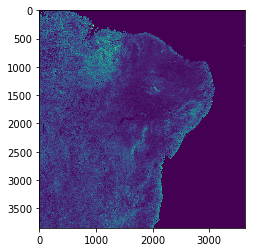

15seca saved.
 


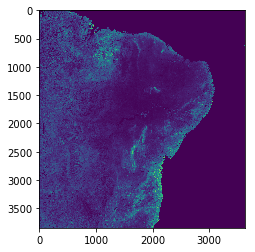

16seca saved.
 


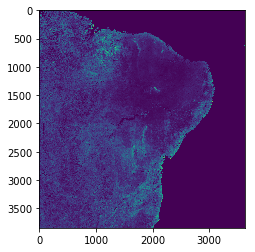

In [47]:
for a in ['14','15','16']:
    toOpen = [x for x in l if x[-9:-7] in ['09','10','11'] and x[-12:-10] in a]
    arrays = []
    for j in toOpen:
        imagem, meta = xu.TifToArray(j)
        imagem = np.where(imagem==32767,np.nan,imagem)
        arrays.append(imagem)
        arrays2 = np.dstack(arrays)    
    median = np.nanmean(arrays2,axis=2)
    xu.ArrayToTif(median,a+'seca',fout,meta,3)
    plt.imshow(median)
    plt.show()